### scraping instagram

scraping Instagram can help in getting the new trends of businesses, so that you can generate more leads and can reach out for your new potential customers. 

In [1]:
!pip install instaloader -q

In [2]:
import instaloader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

C:\Users\Vasudha\anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'cp1252', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


In [3]:
bot=instaloader.Instaloader()

#### getting information about netflix india profile

In [4]:
profile=instaloader.Profile.from_username(bot.context,'primevideo')

In [5]:
print(type(profile))

<class 'instaloader.structures.Profile'>


#### profile info: 

In [6]:
print('username:  ',profile.username)
print('user ID:   ',profile.userid)
print('followers: ',profile.followers)
print('following: ',profile.followees)
print('number of posts: ',profile.mediacount)
print('bio: ',profile.biography,profile.external_url)

username:   primevideo
user ID:    1684102154
followers:  4222643
following:  1489
number of posts:  7037
bio:  Daddy's home. @theboystv season 4 is now streaming. None


#### getting information about 200 most recent posts 

In [7]:
data = []
post_count = 0
for post in profile.get_posts():
    post_data = {'post_id': post.shortcode,'date': post.date,'likes': post.likes,'comments': post.comments,'hashtags': post.caption_hashtags,'is_video': post.is_video}
    data.append(post_data)
    post_count += 1
    if post_count >= 200:
        break

df = pd.DataFrame(data)

In [8]:
df.head()

,post_id,date,likes,comments,hashtags,is_video
0,C8e8zOBxswt,2024-06-21 15:59:28,23815,355,[],True
1,C8bbtKwu-3u,2024-06-20 07:10:43,52033,415,[],False
2,C7UEP5QxUA_,2024-05-23 14:02:33,653519,25087,[],True
3,C8jJV1VuarX,2024-06-23 07:04:10,6237,135,[],False
4,C8iLAoLBw7J,2024-06-22 22:00:35,8040,58,[],True


### Analysis

#### basic statistics

In [9]:
print(df[['likes', 'comments']].describe())

              likes      comments
count     200.00000    200.000000
mean    77806.91000    521.595000
std     98920.91839   1904.826963
min      1295.00000      3.000000
25%      9577.75000     67.000000
50%     48218.00000    151.000000
75%    102731.50000    398.250000
max    653519.00000  25087.000000


#### time series analysis

In [10]:
df['date'] = pd.to_datetime(df['date'])

##### no. of likes

In [11]:
# Group by date to see trends over time
daily_likes = df.groupby(df['date'].dt.date)['likes'].sum()

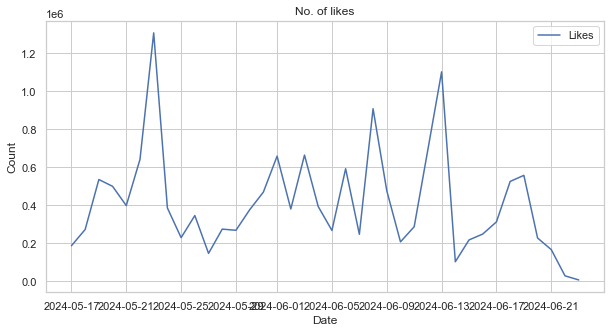

In [12]:
# Plot trends
sns.set(style='whitegrid',palette='deep')
plt.figure(figsize=(10, 5))
daily_likes.plot(kind='line', label='Likes')
plt.title('No. of likes')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


##### no. of comments

In [13]:
daily_comments = df.groupby(df['date'].dt.date)['comments'].sum()

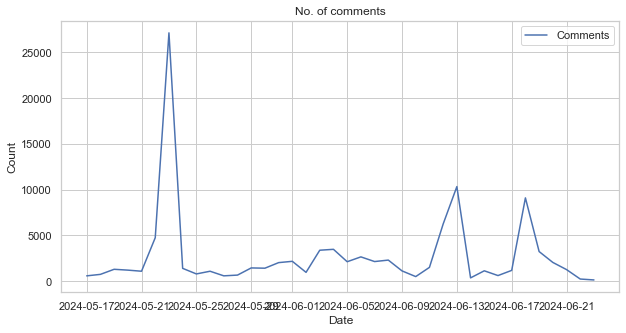

In [14]:
plt.figure(figsize=(10, 5))
daily_comments.plot(kind='line', label='Comments')
plt.title('No. of comments')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

#### video vs image posts

In [15]:
video_posts = df[df['is_video'] == True]
image_posts = df[df['is_video'] == False]

##### video vs image statistics

In [16]:
print(video_posts[['likes', 'comments']].describe())

               likes      comments
count     115.000000    115.000000
mean    44534.591304    573.469565
std     83018.131290   2457.701962
min      1295.000000      3.000000
25%      4278.500000     42.000000
50%     14279.000000     98.000000
75%     45884.000000    291.000000
max    653519.000000  25087.000000


In [17]:
print(image_posts[['likes', 'comments']].describe())

               likes     comments
count      85.000000    85.000000
mean   122822.400000   451.411765
std    101303.479176   624.142865
min      3467.000000    10.000000
25%     57892.000000   110.000000
50%     96109.000000   218.000000
75%    163032.000000   461.000000
max    595961.000000  3252.000000


##### likes distribution

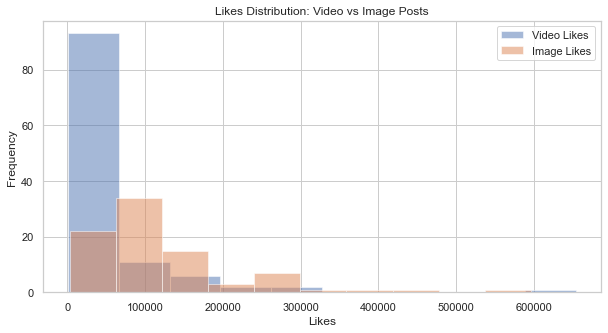

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(video_posts['likes'], alpha=0.5, label='Video Likes')
plt.hist(image_posts['likes'], alpha=0.5, label='Image Likes')
plt.title('Likes Distribution: Video vs Image Posts')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##### comments distribution

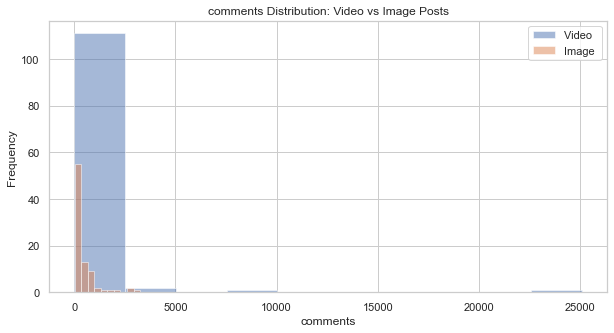

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(video_posts['comments'], alpha=0.5, label='Video ')
plt.hist(image_posts['comments'], alpha=0.5, label='Image ')
plt.title('comments Distribution: Video vs Image Posts')
plt.xlabel('comments')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### top 5 most used hastags

In [20]:
top_hashtags = df['hashtags'].explode().value_counts().head(5)

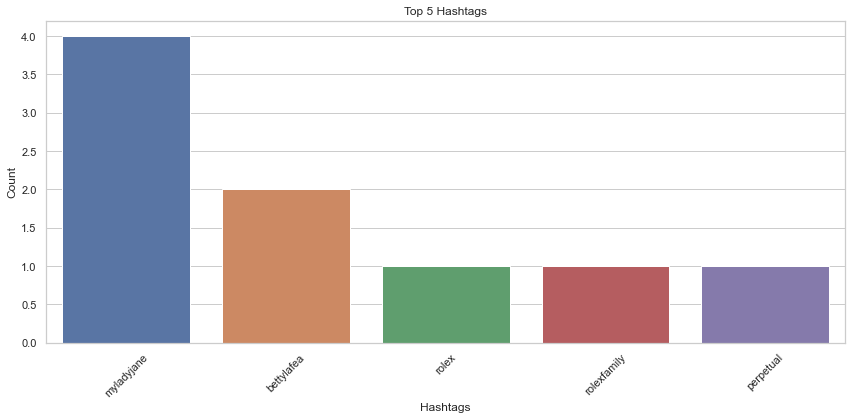

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hashtags.index, y=top_hashtags.values)
plt.title('Top 5 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### post frequency

In [22]:
post_frequency_by_day = df['date'].dt.dayofweek.value_counts().sort_index()
days=['mon','tues','wed','thu','fri','sat','sun']

In [23]:
post_frequency_by_day.index=days
post_frequency_by_day

mon     24
tues    32
wed     28
thu     31
fri     30
sat     30
sun     25
Name: date, dtype: int64